# The Mayfly Model
The "Mayfly Model" is a recursive model of the population of the mayfly species over a given period of time. For the sake of simplicity, the value of the population $x_t$ is actually a scaled value bounded to $[0,1]$. The formula for finding the mayfly population at a time $t$ is given as $x_{t+1} = bx_t(1 - x_t)$. Where the range of $b$ can be solved by using elementary calculus (which will be done later). In a physical sense, its the coefficent that represents the number of surviving offspring per adult member of the population.

I'd like to run the mayfly model to see how the population changes over time for different values of $b$. In order to do this I need to first find the bound of the parameter $b$. The mayfly population is given by the function 

\begin{equation}
x_{t+1} = bx_t(1 - x_t)
\end{equation}

To find the bound we need to minimize/maximize the function, which requires us to take a derivative with respect to the independent varialbe $x_t$, we'll disregard the $b$ for just a moment.

\begin{equation}
x_{t+1}' = 1 - 2x_t = 0 \rightarrow x_t = .5
\end{equation}

If you just observe the function, the squared term has a negative out front which means the function is concave down, making the point we found the maximum. Back to the function, using our maximum point 

\begin{equation}
x_{t+1} = b.5(1 - .5) = .25b .
\end{equation}

We know that the parameter $x_t$, at any time $t$ is bouned $[0,1]$ which makes the bounds of $b$, $[0,4]$. With this we can make plots of this system with different values of $b$ and $x_t$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline 

In [2]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    '''Found on stack exchange, for the titles of the subplots'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [3]:
def plot_mayfly(x,b,t):
    time = np.empty(t + 1)
    pop = np.empty(t + 1)
    xt = x
    for j in range(0, t + 1):
        time[j] = j
        xt = b*xt*(1 - xt)
        pop[j] = xt
    plt.plot(time,pop, label = "x = {}".format(x))
    plt.legend(loc=1,prop={'size':10})
    plt.xticks([])
    plt.yticks([])

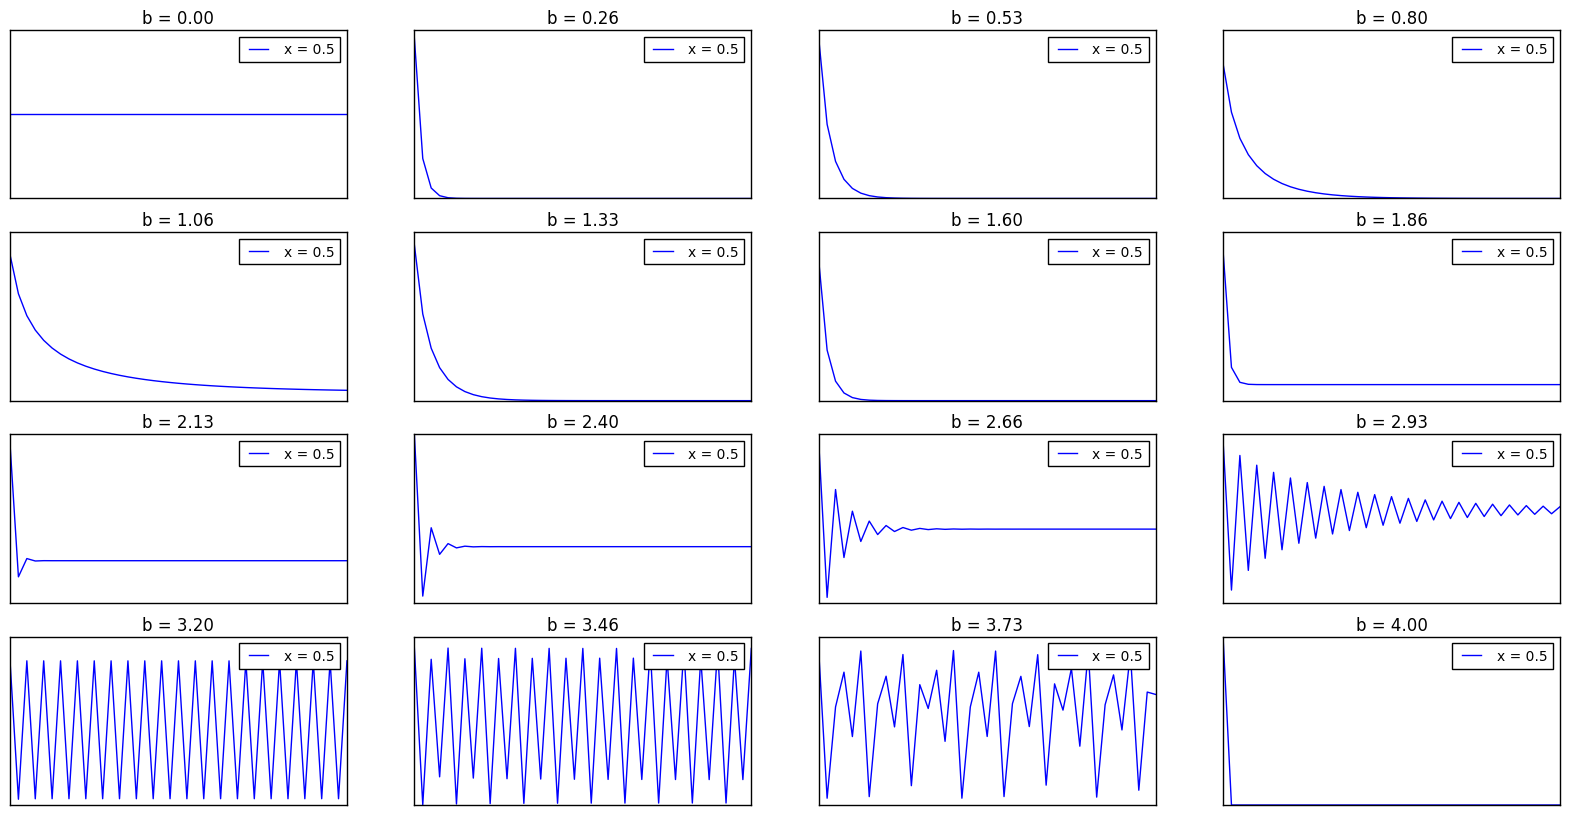

In [4]:
plt.figure(figsize = (20,10))
b = np.linspace(0,4,16)
k = 1
for i in b:
    plt.subplot(4,4,k)
    plt.title("b = {}".format(truncate(i, 2)))
    plot_mayfly(.5,i,40)
    k += 1

We see that for values of $ 0 < b < 3$ we get the population to approach a constant over a cerntain amount of years. when $b > 3$ we see periodic motion of the population, which is more uniform with lower values, say $b = 3.2$, but seemligly more choatic for $b = 3.73$. If $ b < 1$ then the constant the population approaches is zero; this seems to be true for any value $x_0$ which we'll see in the next cell.  

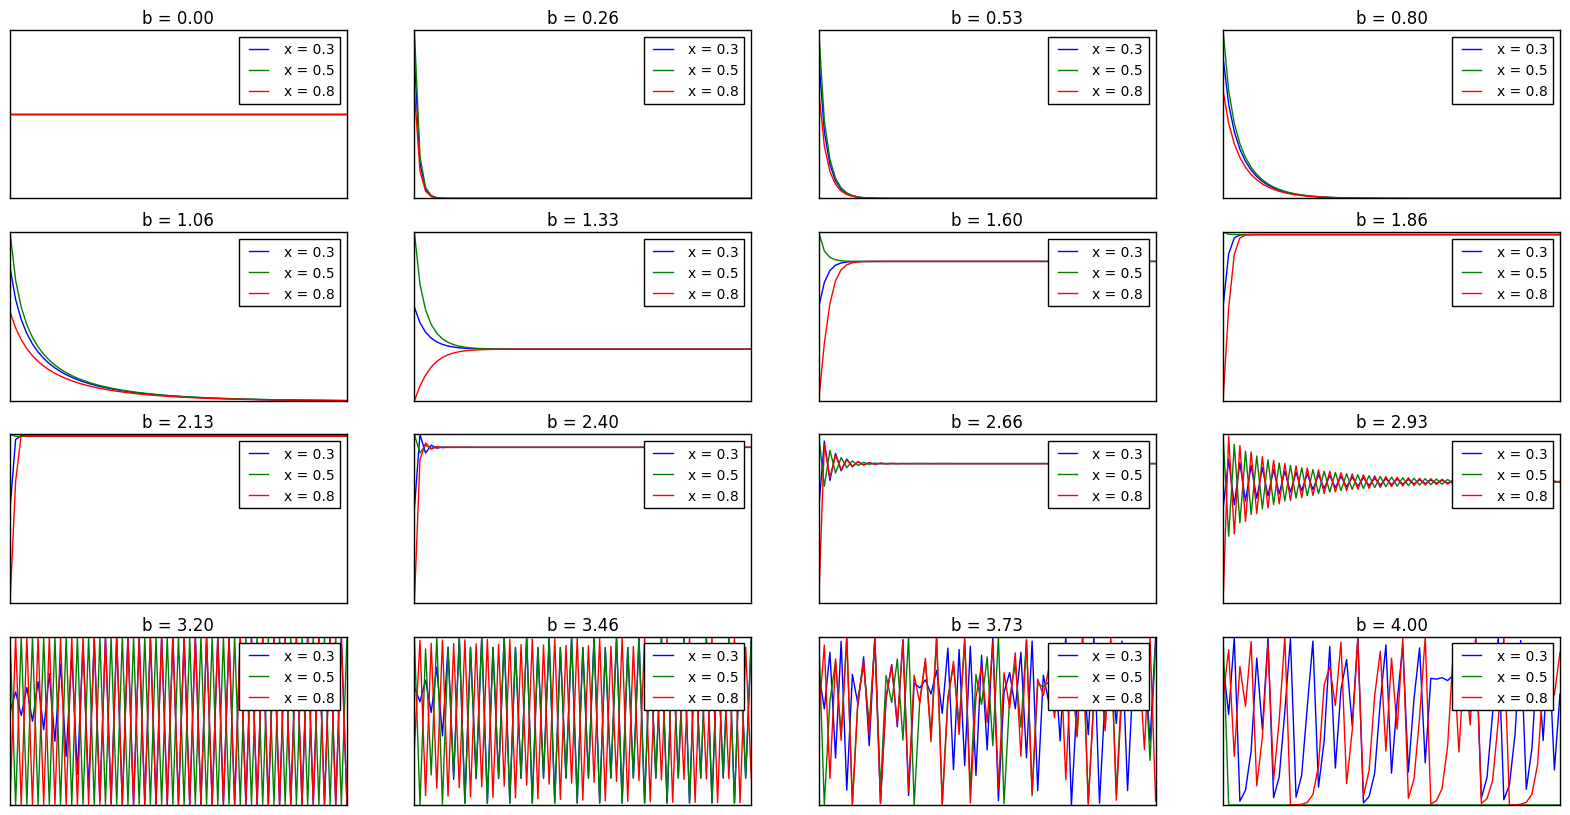

In [5]:
plt.figure(figsize = (20,10))
b = np.linspace(0,4,16)
k = 1
for i in b:
    plt.subplot(4,4,k)
    plt.title("b = {}".format(truncate(i, 2)))
    plot_mayfly(.3,i,60)
    k += 1
k = 1
for i in b:
    plt.subplot(4,4,k)
    plt.title("b = {}".format(truncate(i, 2)))
    plot_mayfly(.5,i,60)
    k += 1
k = 1
for i in b:
    plt.subplot(4,4,k)
    plt.title("b = {}".format(truncate(i, 2)))
    plot_mayfly(.8,i,60)
    k += 1

As you can see the different values of $x_0$ seem to make no difference at all in terms of which constant $x_t$ approaches, for $b < 3$. for $ b > 3$, aside for the minor variance in the period, the only notable difference is for $ b = 4, \ x_t = .5 $ where the population quickly heads to zero. From this experiment we can see the really important variable in this model is $b$, and not so much in the initail population. After a certain amount of time we see convergence of the population, if it be a constant or some  set of constants, in the case for the periodic populations. If we run our experiment out a certain amount of time and plot the $b$ values verse their corresponding population constant or set of constants we might see some interesting phenomena.

In [6]:
def asym(xmin,xmax,ymin, ymax, n,op = .3):
    b = np.linspace(xmin,xmax,n)
    x = .5
    for j in range(1000):
        x = b*x*(1 - x)
    for j in range(1000, 5001):
        x = b*x*(1 - x)
        plt.plot(b,x,'m.' , ms = .1,alpha = op)
        plt.title('b vs. x over time = 1000 to 5000')
        plt.ylabel('x')
        plt.xlabel('b')
        plt.ylim(ymin,ymax)
        plt.xlim(xmin,xmax)

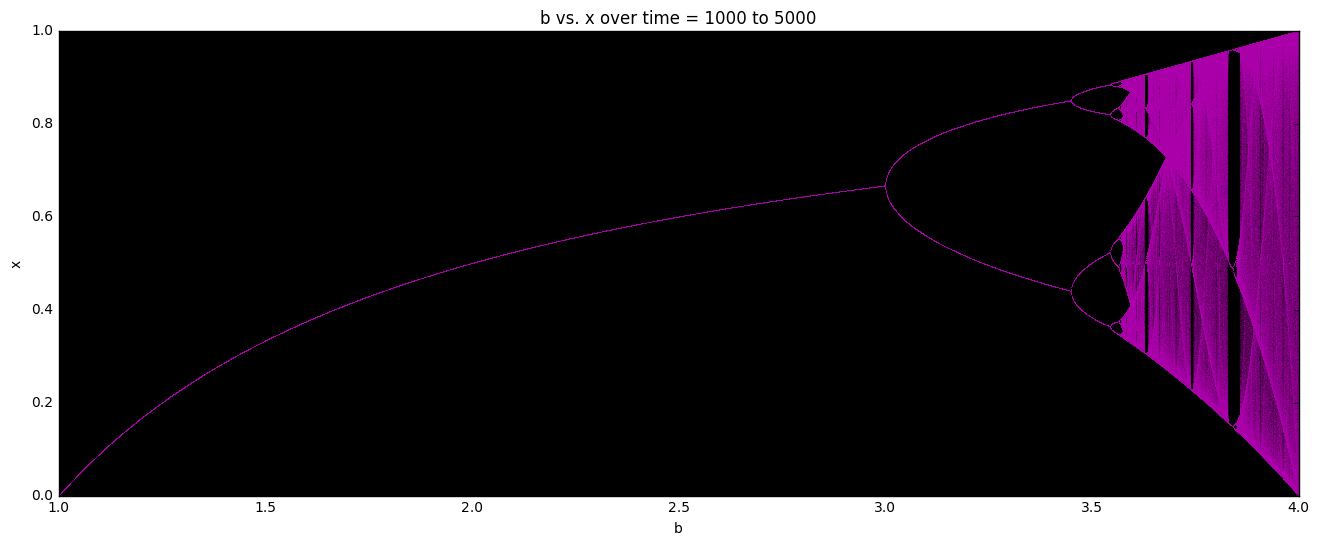

In [7]:
fig = plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(1,4,0,1,5000)

From earlier we saw that the constant the population converged to, for $b < 1$, was zero so I omitted it from the model. The above algorithm went through the first 1000 years to get the constant population behavior, then from 1000 to 5000 years plotted the population for the given value of $b$. Right away we can see the periodic behavoir take shape at $b = 3$ and continue to grow as $b$ increases. A very odd feature I noticed was the strip of black in the graph that indicates a well behaved system (sort of) where I'd expect chaos. If you look closely this break off seems to emulate the initial plot, with the constant population out to a certain $b$ value where it then breaks off. Zooming in on the graph  

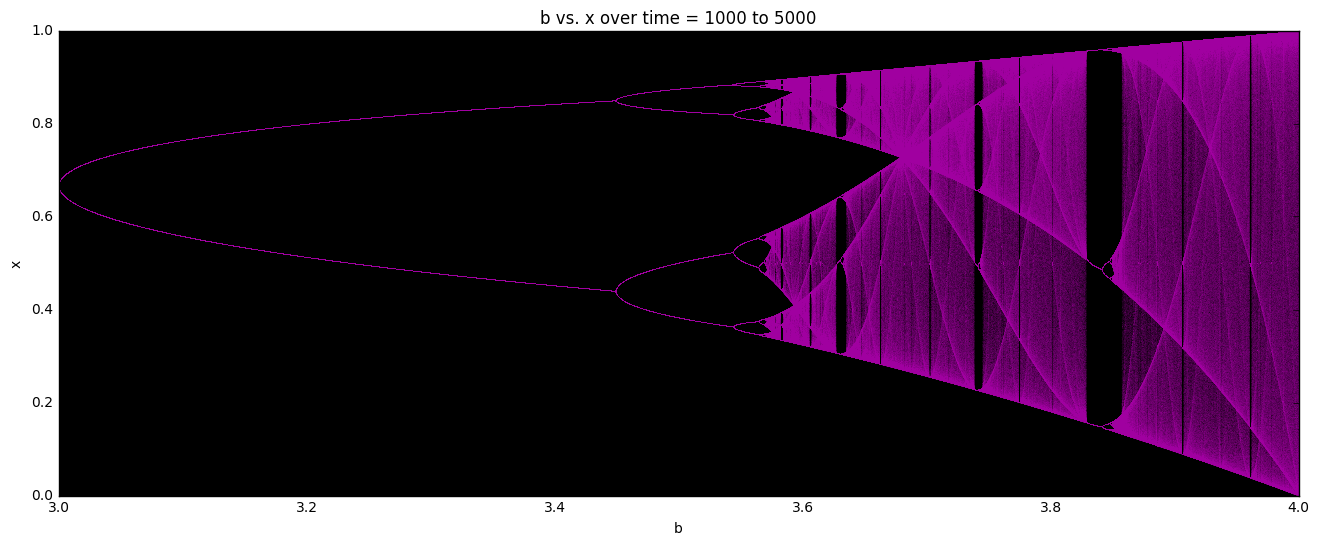

In [8]:
fig = plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(3,4,0,1,5000, op = .2)

Zooming in seems to show that the sequence continues where the period increase by a factor of 2 at certain values of $b$ when going from 3 to 4. The strips of white seem to appear all over this plot which might indicate that there is some order embedded in here. Following the same idea, I will zoom in on the top split to see the behavior more in depth.

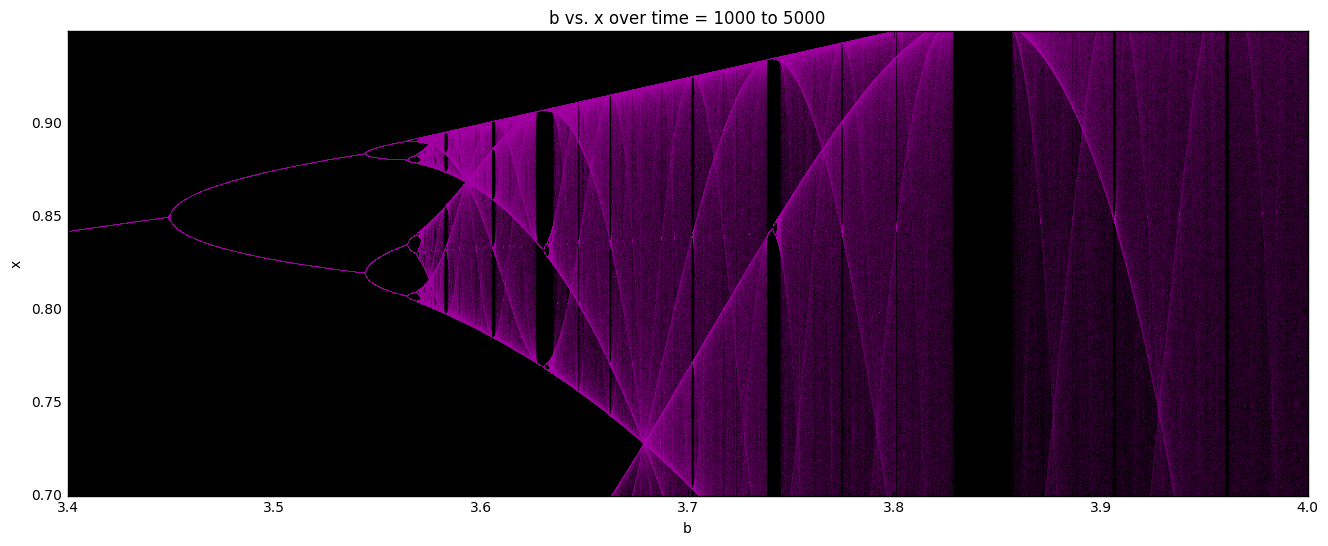

In [9]:
fig = plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(3.4,4,.7,.95,5000, op = .2)

There's a lot to look at here, first the little spots that seem to move in a straight line are the points where the population splits, which in itself looks periodic. The part I'd like to look at first is the place of intersection that happens at around $b = 3.67$, it also seems to happen ar $b = 3.58$, but I'll look at that after. 

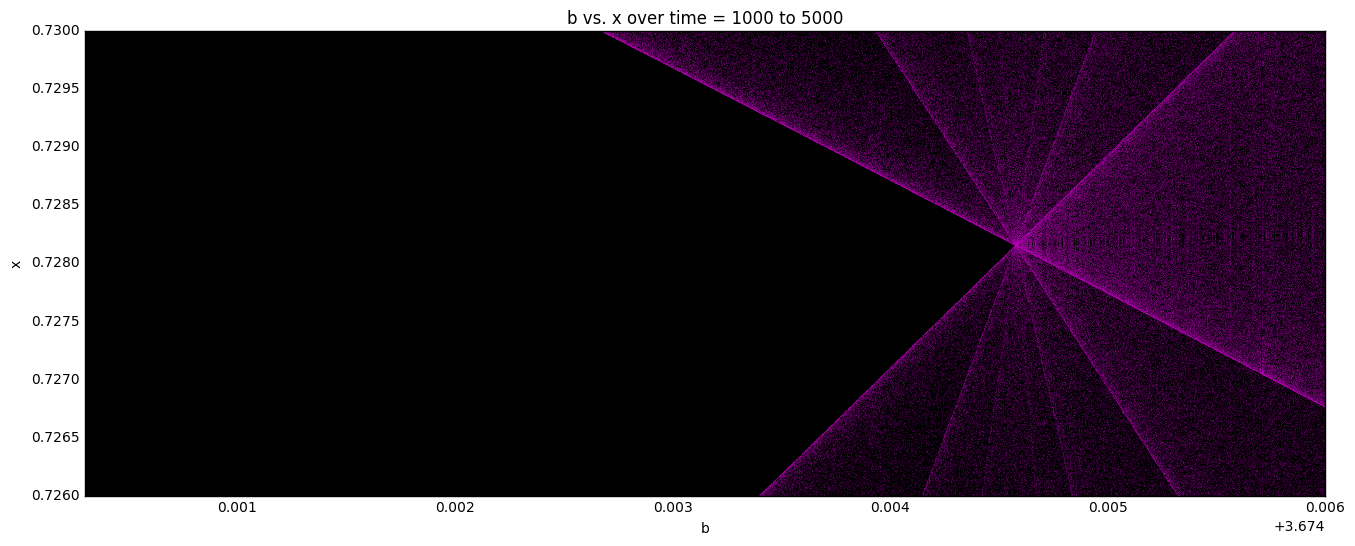

In [10]:
plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(3.6743,3.68,.726,.730,5000, op = 1)

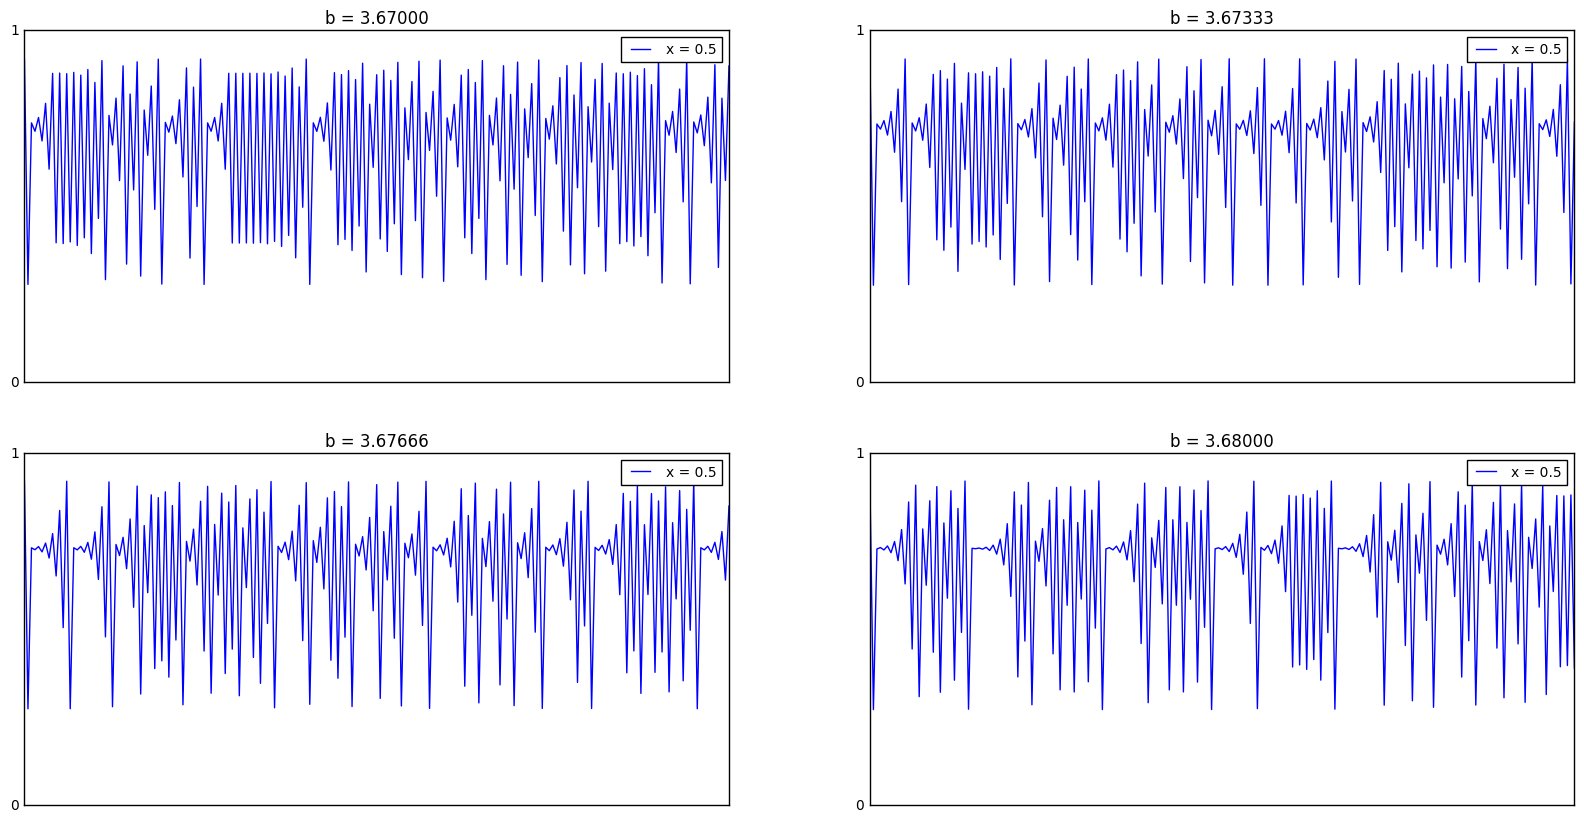

In [11]:
plt.figure(figsize = (20,10))
b = np.linspace(3.67,3.68,4)
k = 1
for i in b:
    plt.subplot(2,2,k)
    plt.title("b = {}".format(truncate(i, 5)))
    plot_mayfly(.5,i,200)
    plt.yticks([0,1])
    k += 1

Looking at the behavior of the population at isolated values of $b$ shows that the population has a mini convergence to around .7 which is interesting. Looking at the other mass intersection point we can see from the larger graph we get

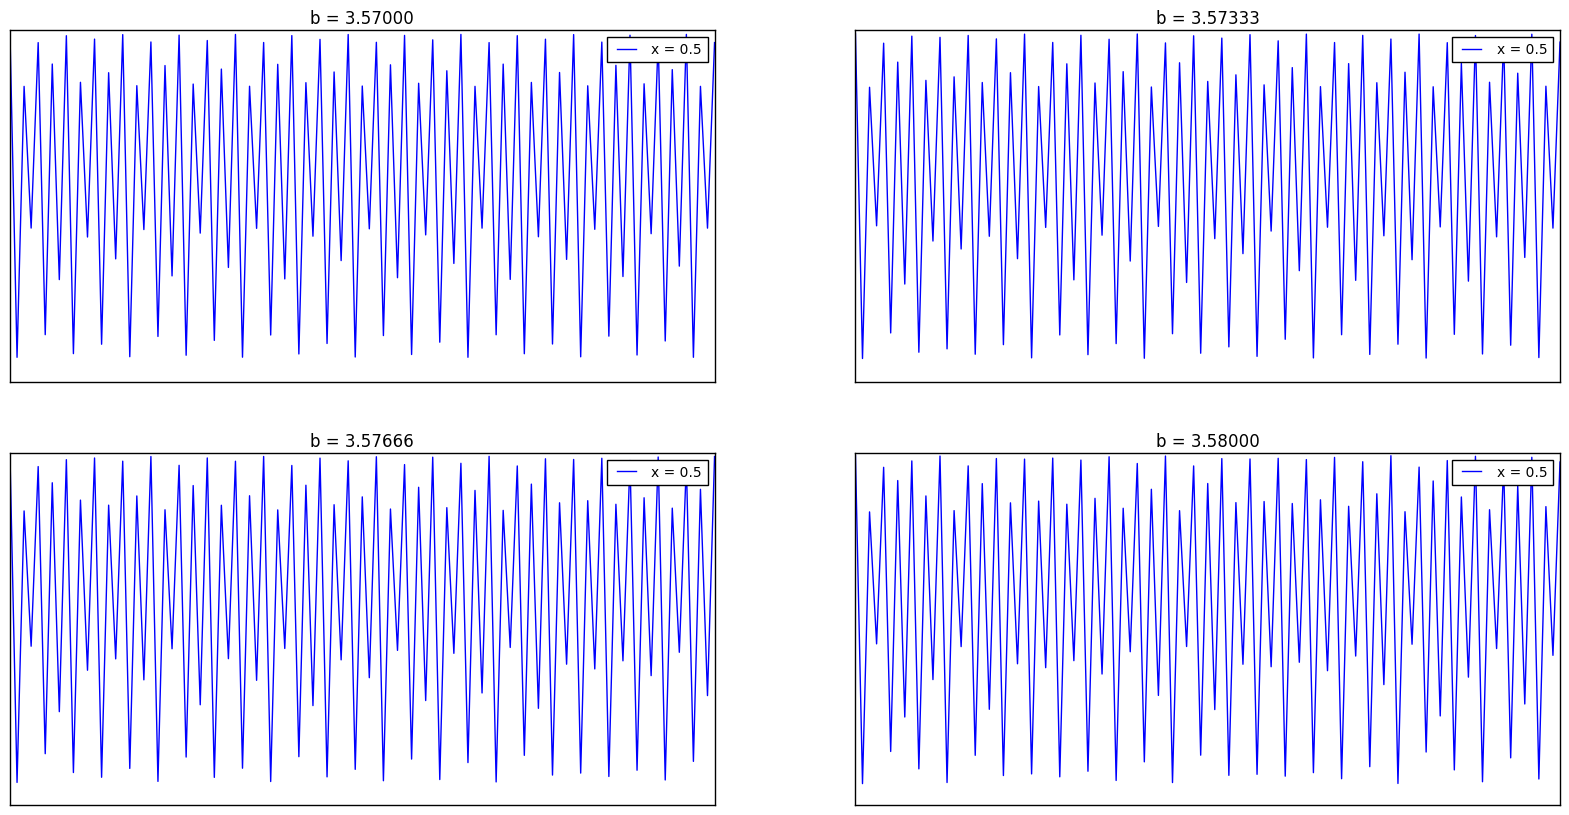

In [12]:
plt.figure(figsize = (20,10))
b = np.linspace(3.57,3.58,4)
k = 1
for i in b:
    plt.subplot(2,2,k)
    plt.title("b = {}".format(truncate(i, 5)))
    plot_mayfly(.5,i,100)
    k += 1

There is no noticable convergence like in the previous intersection and since the nature of this system is periodic that might mean that the first intersection is a uniques point on the graph. The last thing I'd like to look at is the blank strips mentioned earlier. If we modify the algorithm from the beginning to have a dot at each value of $x_t$ that appears over time we can see the period settle to 3 then quickly become choatic again.

In [13]:
def plot_mayfly_d(x,b,t):
    time = np.empty(t + 1)
    pop = np.empty(t + 1)
    xt = x
    for j in range(0, t + 1):
        time[j] = j
        xt = b*xt*(1 - xt)
        pop[j] = xt
    plt.plot(time,pop, 'r.-', label = "x = {}".format(x))
    plt.legend(loc=1,prop={'size':10})
    plt.xticks([])
    plt.yticks([])

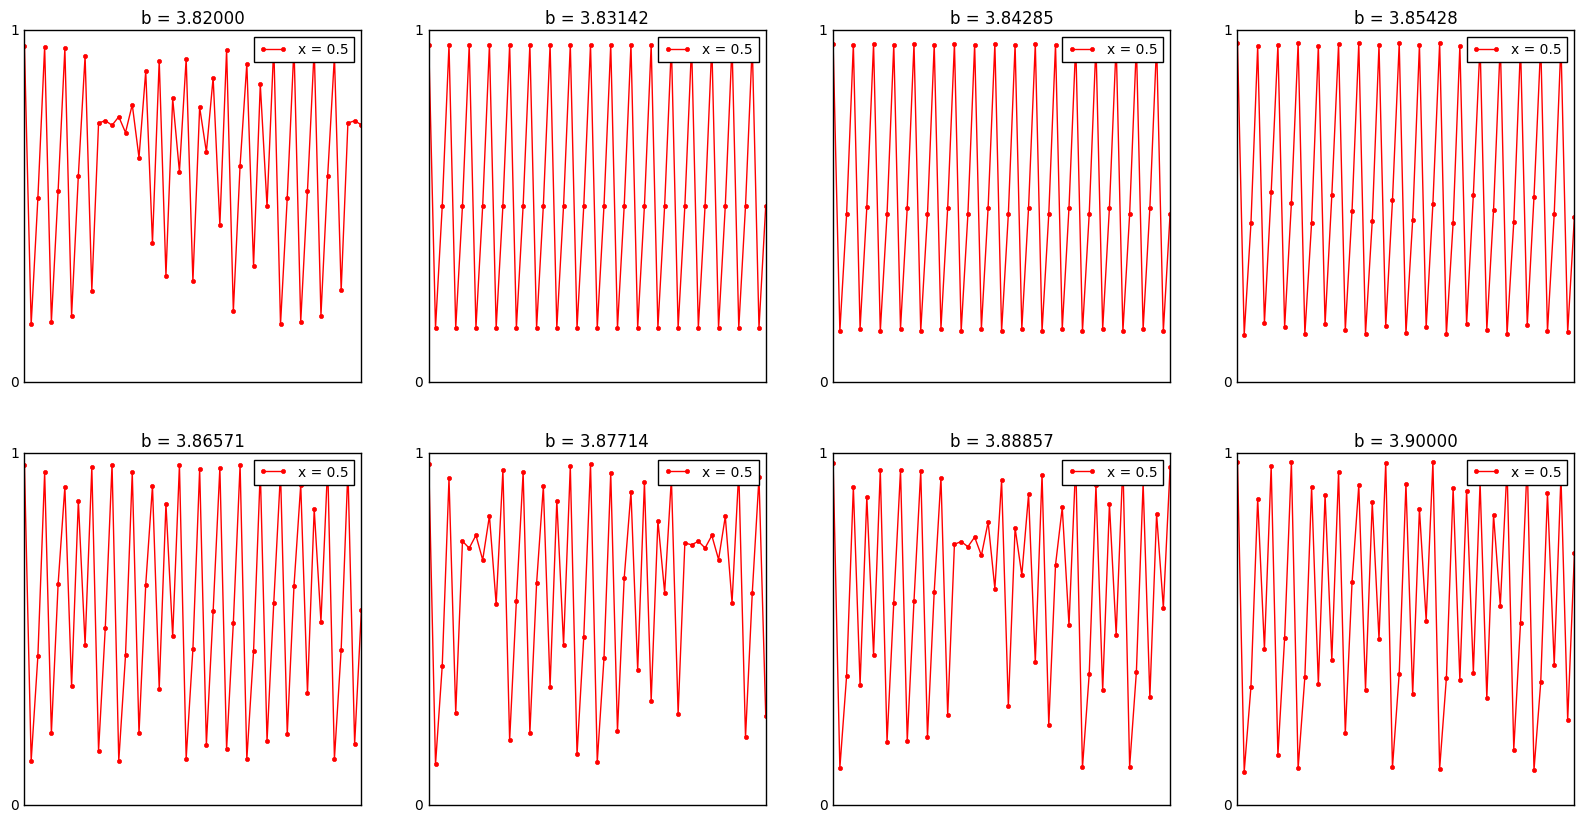

In [14]:
plt.figure(figsize = (20,10))
b = np.linspace(3.82,3.9,8)
k = 1
for i in b:
    plt.subplot(2,4,k)
    plt.title("b = {}".format(truncate(i, 5)))
    plot_mayfly_d(.5,i,50)
    plt.yticks([0,1])
    k += 1

This matches up with what we see in the plot; at $b = 3.83$ we see that the population settles at 3 points. There's not much that I see here that is helpful in determining the population's growth nature. Going back to the original plot, we can see quadratic structures that take place throughout the entire plot past $b = 3$.

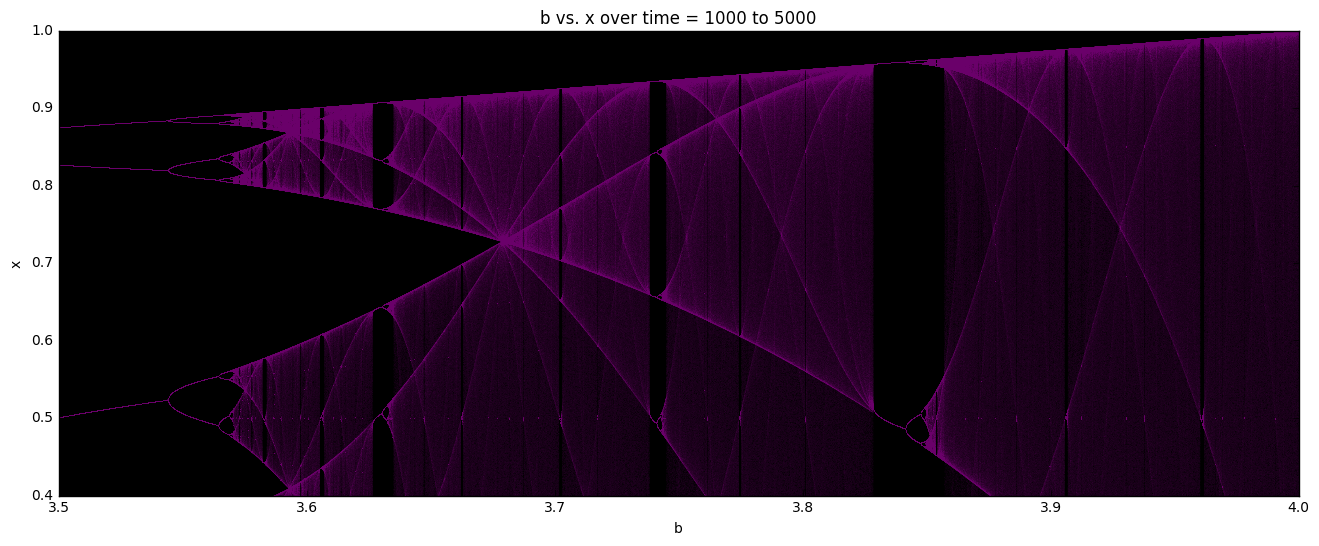

In [15]:
fig = plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(3.5,4,.4,1,5000, op = .08)

When we strip away more of the points we see these periodic functions form underneath the chaos. Since we know that the populations are periodic in nature this might be the underlining cause for it. As you can see more clearly now the large black strip mentioned above shows this whole process happen again. Final note, there also seems to be quadratice function in the data, which makes sense since the recursive formula is quadratic. 

# The Butterfly Effect 
Going back to an idea we saw earlier when looking at the devlopment of the population with different initial populations. It didnt seem to have a huge impact on the system, at least compared to the $b$ value that had a huge change to the system. We'll take an initial population and then another that is a little bit bigger and see how they develop over time. As we saw earlier, it didnt seem to do much, but for some cases it might. For those cases we have a butterfly effect, where the initial population effects the trajectory of the entire population after a certain amount of time. Going back we see that $b > 3.5$ had periods of the population that differed so we might see the butterfly effect take place for those b values. 

In [16]:
def butt_eff(n,b,tmin,tmax,ep):
    m = n + ep
    r = 0
    s = np.zeros(tmax - tmin )
    t = np.zeros(tmax - tmin )
    for j in range(tmin, tmax):
        t[r] = j
        n = b*n*(1 - n)
        m = b*m*(1 - m)
        s[r] = abs(n - m)
        r += 1
    plt.title('b = {}'.format(truncate(b, 3)))
    plt.plot(t, s, 'r.-', ms = 3)

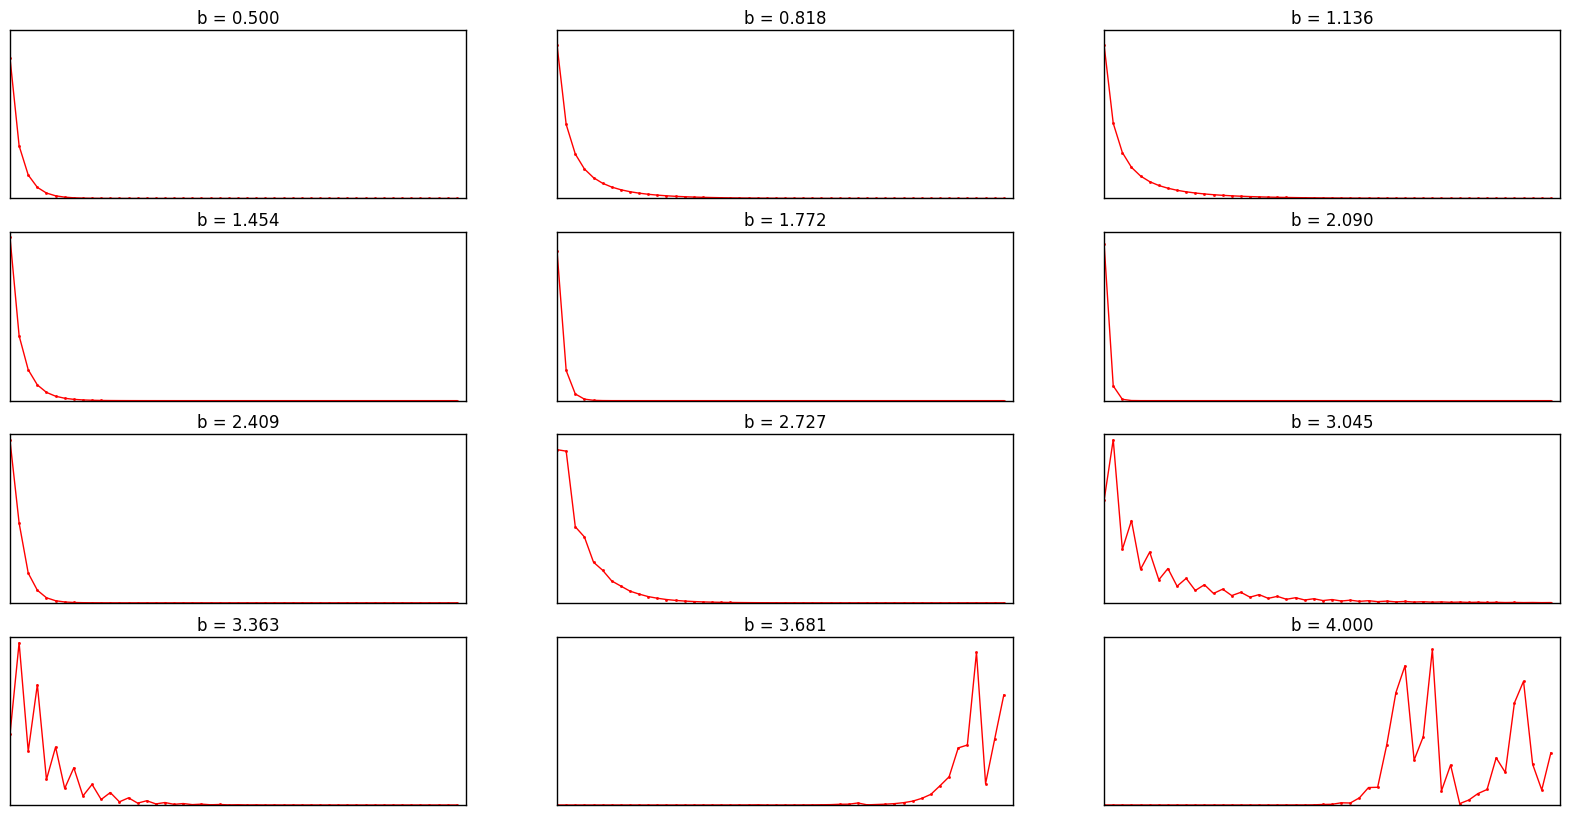

In [17]:
plt.figure(figsize = (20,10))
b = linspace(.5,4,12)
k = 1
for i in b:
    plt.subplot(4,3,k)
    butt_eff(.51,i, 0,50, 1e-10)
    plt.yticks([])
    plt.xticks([])
    k += 1

The method for generating these plots is similar to the way I did it in the beginning, but the difference is now we are plotting the separation between the two populations at any given time. The reson behind this is to see how the growth of the population, given a different initial population, develops. We are plotting the separation bewteen the two initial populations to see how the difference builds over time. As you can see from these plots, the separation looks exponential so we can modify the code to plot $t \ vs. \ log(y)$; this should give us a straight line.

In [18]:
def butt_eff_new(n,b,tmin,tmax,ep):
    m = n + ep
    r = 0
    s = np.zeros(tmax - tmin )
    t = np.zeros(tmax - tmin )
    for j in range(tmin, tmax):
        t[r] = j
        n = b*n*(1 - n)
        m = b*m*(1 - m)
        s[r] = abs(n - m)
        r += 1
    plt.title('b = {}'.format(truncate(b, 3)))
    plt.semilogy(t, s, 'r.-', ms = 3)

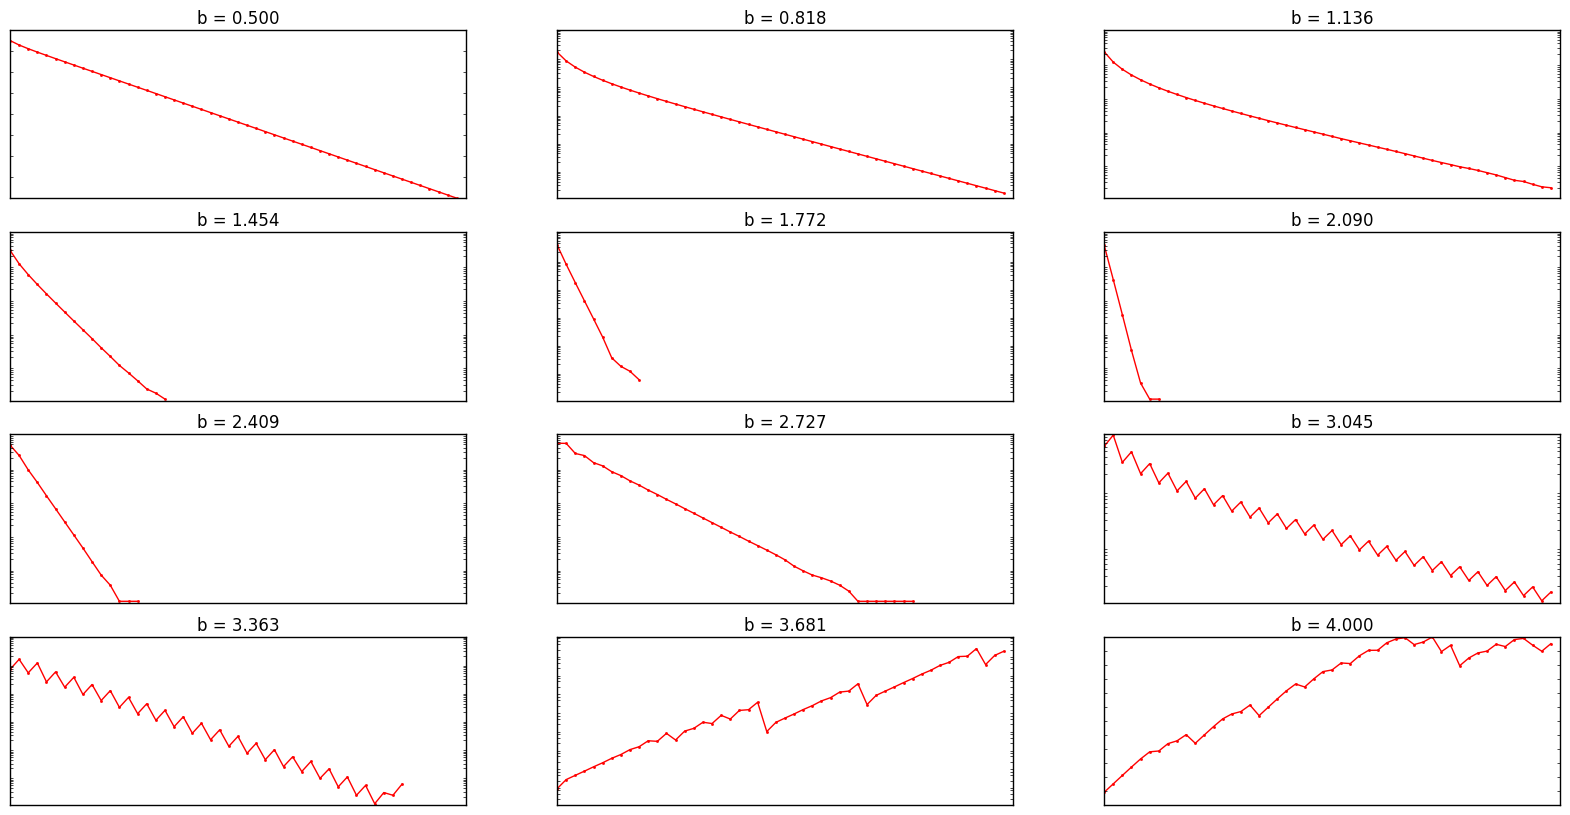

In [19]:
plt.figure(figsize = (20,10))
b = linspace(.5,4,12)
k = 1
for i in b:
    plt.subplot(4,3,k)
    butt_eff_new(.51,i, 0,50, 1e-10)
    plt.yticks([])
    plt.xticks([])
    k += 1

Comparing these graphs to our previous ones we can see that when we use the semilogy function from numpy we get a (somewhat) straight line, for a certain amount of time on a majority of the plots. There seems to be three types of plots, for $b < 1$ they seem to separate exponetially, decreasing their separation over time, i.e they start to approach the same constant (which we know is zero). For $ 1 < b < 3$, they converge exponentially to constant population very quickly, relative to the other types of plots. For about $b > 3.5$ we start to see the butterfly effect take shape, which is apparent due to the linear growth of the plot, which then turns into a choatic mess past a certain time. What we can do now is fit a function to these data points to get the equation of the separation over time. In order to do this correctly we need to find the time interval in which the growth or decay is linear, which we use the above plots to help. The formula to find the fit is tedious to derive so the solution is

$$\begin{pmatrix}
1 & \bar{x} \\
\bar{x} & \bar{x^2}
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 
\end{pmatrix} = 
\begin{pmatrix}
\bar{y} \\
\bar{xy}
\end{pmatrix}
$$

where $w_0$ and $ w_1$ are the coefficients in the formula $f(x) = w_0 + w_1x$. This means that if we raise $e$ to the outputted function that a semilogy plot of it will return a straight line that is the fit to our data.

In [20]:
def best_fit(n,b,tmin,tmax,ep):
    y = []
    x = []
    m = n + ep
    r = 0
    s = np.zeros(tmax - tmin )
    fit = np.zeros(tmax - tmin )
    t = np.zeros(tmax - tmin )
    Mat = np.empty([2,2])
    Sol = np.empty([2])
    for j in range(tmin, tmax):
        t[r] = j
        n = b*n*(1 - n)
        m = b*m*(1 - m)
        s[r] = abs(n - m)
        r += 1
    plt.semilogy(t, s, 'r.', ms = 10, label = 'Original data')
    yav = np.mean(np.log(s))
    xav = np.mean(t)
    xav2 = np.mean(t*t)
    xyav = np.mean(np.log(s)*t)
    Mat[0,0] = 1
    Mat[0,1] = xav
    Mat[1,0] = xav  
    Mat[1,1] = xav2
    Sol[0] = yav
    Sol[1] = xyav
    Ans = np.linalg.solve(Mat,Sol)
    r = 0
    for i in range(tmin, tmax):
        fit[r] = Ans[0] + Ans[1]*i
        r += 1
    plt.semilogy(t,np.exp(fit), label = 'f(x) = {} + {}x'.format(truncate(Ans[0],4), truncate(Ans[1],4)))
    plt.legend(loc=5,prop={'size':7})
    

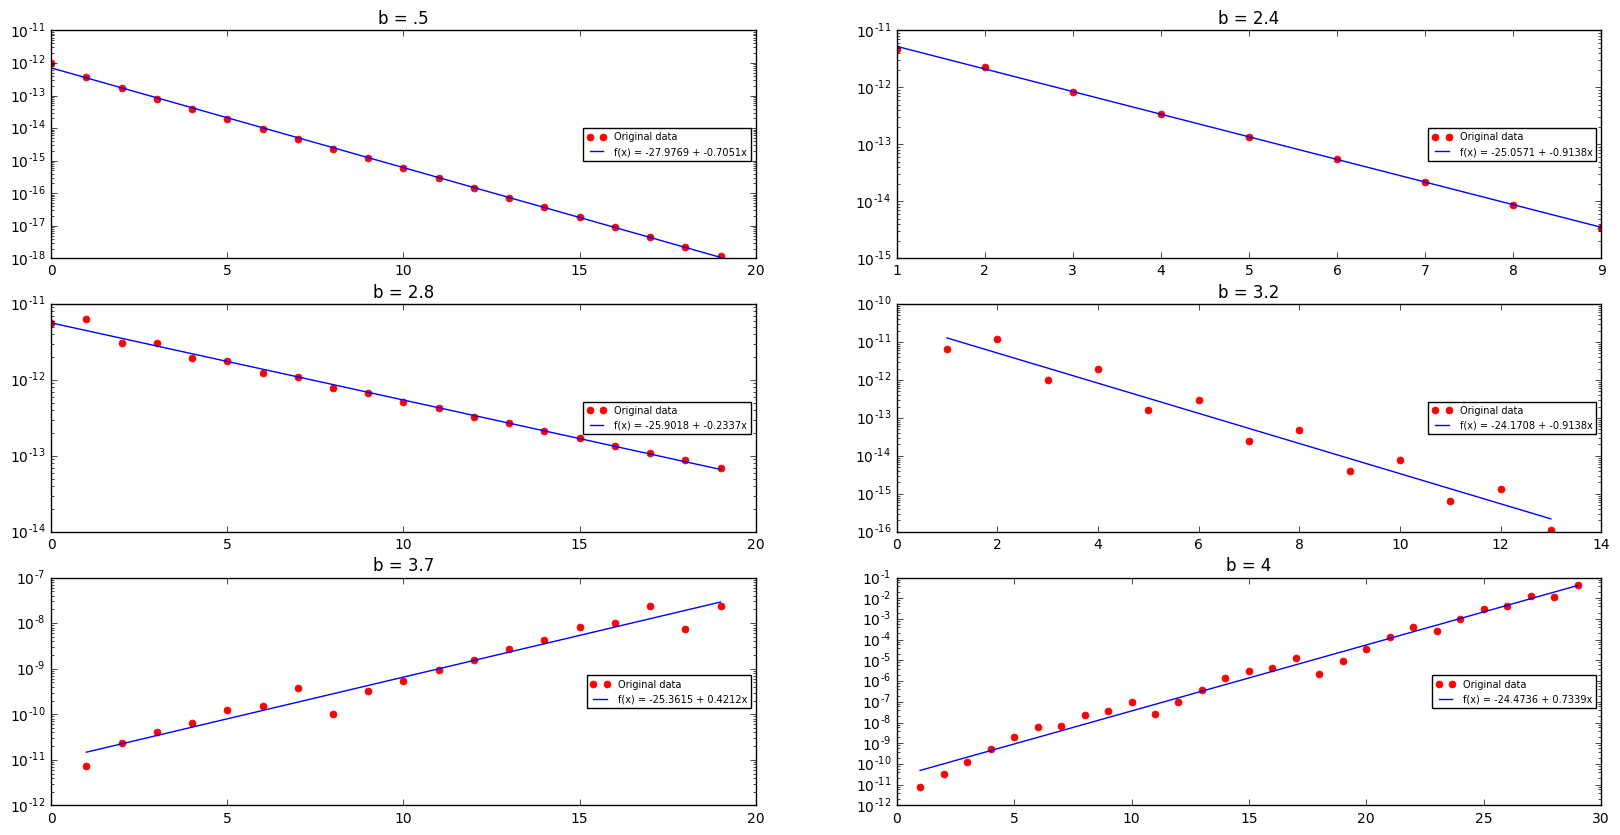

In [21]:
plt.figure(figsize = (20,10))
subplot(3,2,1)
plt.title('b = .5')
best_fit(.51,.5, 0,20, 1e-10)
subplot(3,2,2)
plt.title('b = 2.4')
best_fit(.51,2.4, 1,10, 1e-10)
subplot(3,2,3)
plt.title('b = 2.8')
best_fit(.51,2.8, 0,20, 1e-10)
subplot(3,2,4)
plt.title('b = 3.2')
best_fit(.51,3.2, 1,14, 1e-10)
subplot(3,2,5)
plt.title('b = 3.7')
best_fit(.51,3.7, 1,20, 1e-10)
subplot(3,2,6)
plt.title('b = 4')
best_fit(.51,4, 1,30, 1e-10)

After some testing, the fit seems to be very accurate, excpet for b values around $b = 3.5$ which looks to be the point where the slope of the function changes from neative to positive. Around that area the points are jumbled and have a periodic order to them as shown below

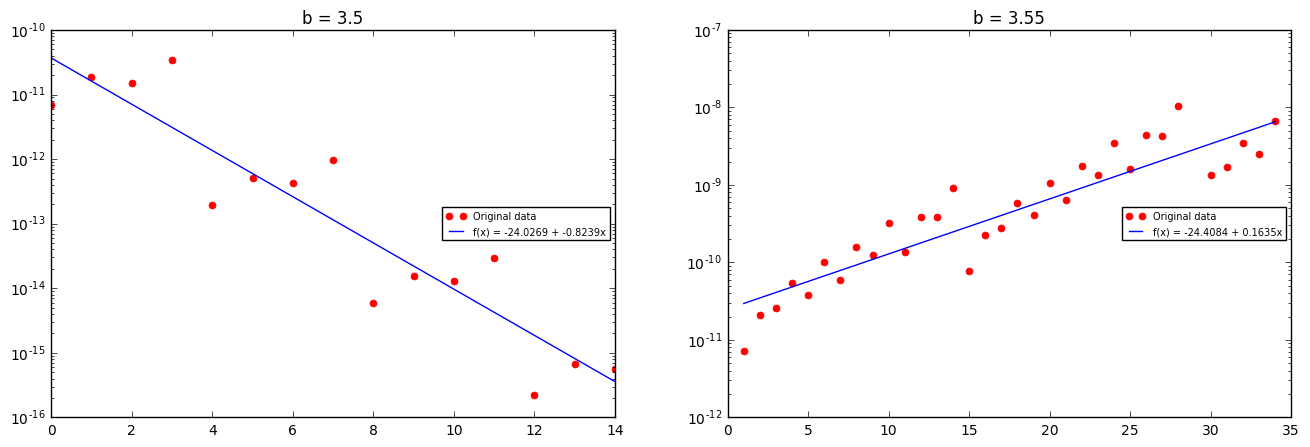

In [22]:
plt.figure(figsize = (16,5))
subplot(1,2,1)
plt.title('b = 3.5')
best_fit(.51,3.5, 0,15, 1e-10)
subplot(1,2,2)
plt.title('b = 3.55')
best_fit(.51,3.6, 1,35, 1e-10)

It looks as if the separtion is moving around a certain amount of points for each value of $b$. Once $b$ gets to around $3.7$ it straightens out and shows that the difference between the two initial populations causes a butterfly effect. The plots above, for $b > 3.6$ show the butterfly effect, which is evident by the linear (exponential in a normal x vs. y graph) fit. so for values of $b$ around $3.6$ and higher produce the butterfly effect. 

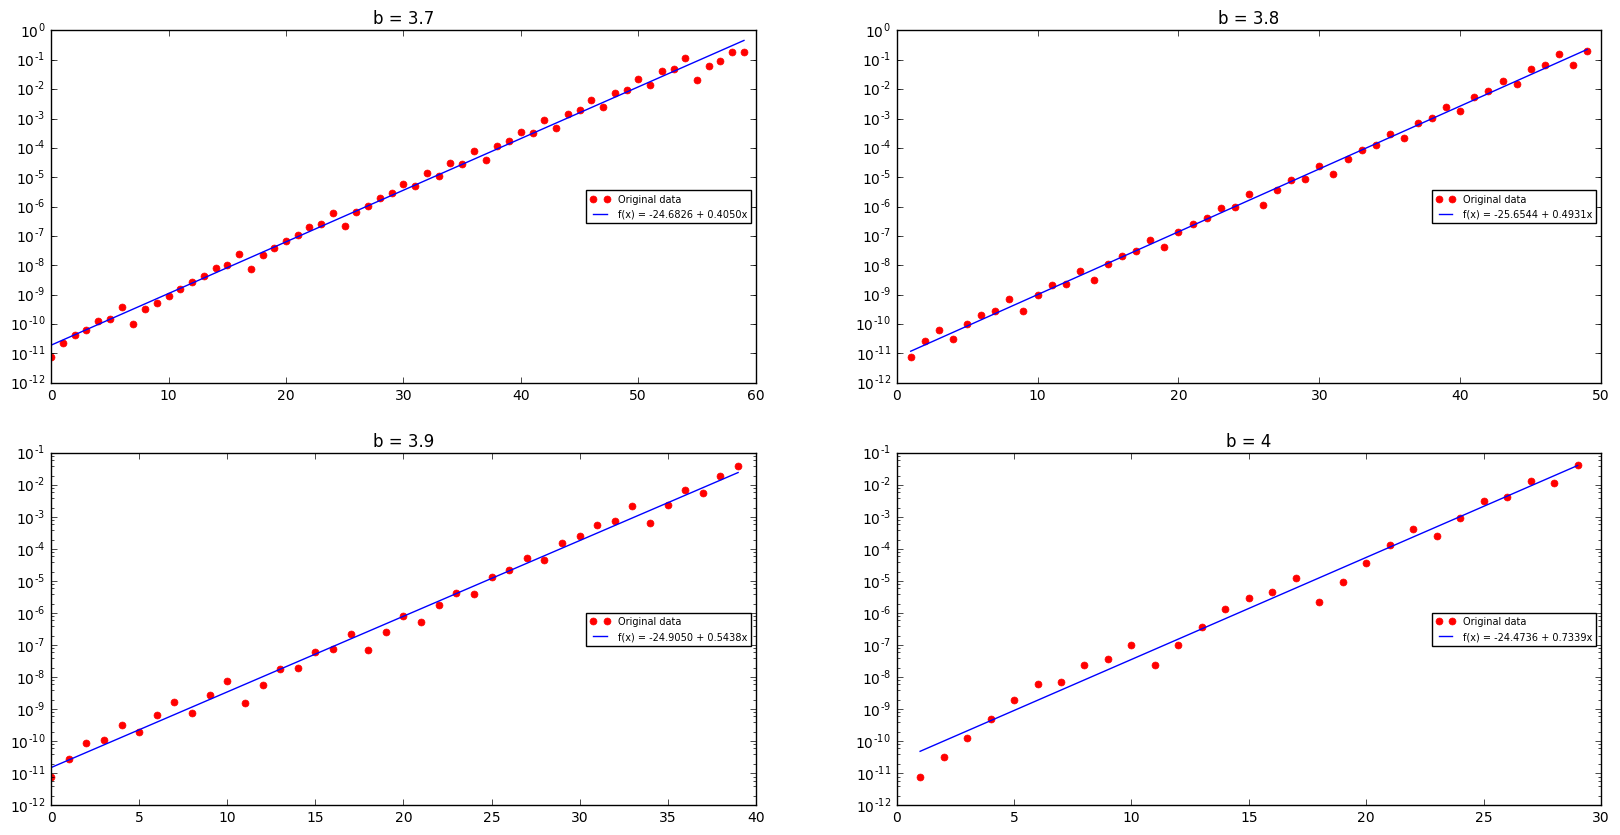

In [23]:
plt.figure(figsize = (20,10))
subplot(2,2,1)
plt.title('b = 3.7')
best_fit(.51,3.7, 0,60, 1e-10)
subplot(2,2,2)
plt.title('b = 3.8')
best_fit(.51,3.8, 1,50, 1e-10)
subplot(2,2,3)
plt.title('b = 3.9')
best_fit(.51,3.9, 0,40, 1e-10)
subplot(2,2,4)
plt.title('b = 4')
best_fit(.51,4, 1,30, 1e-10)

These plots show the butterfly effect that takes place when $b \geq 3.6$. I compared these $b$ values to the original plot to see if they correspond to anything.

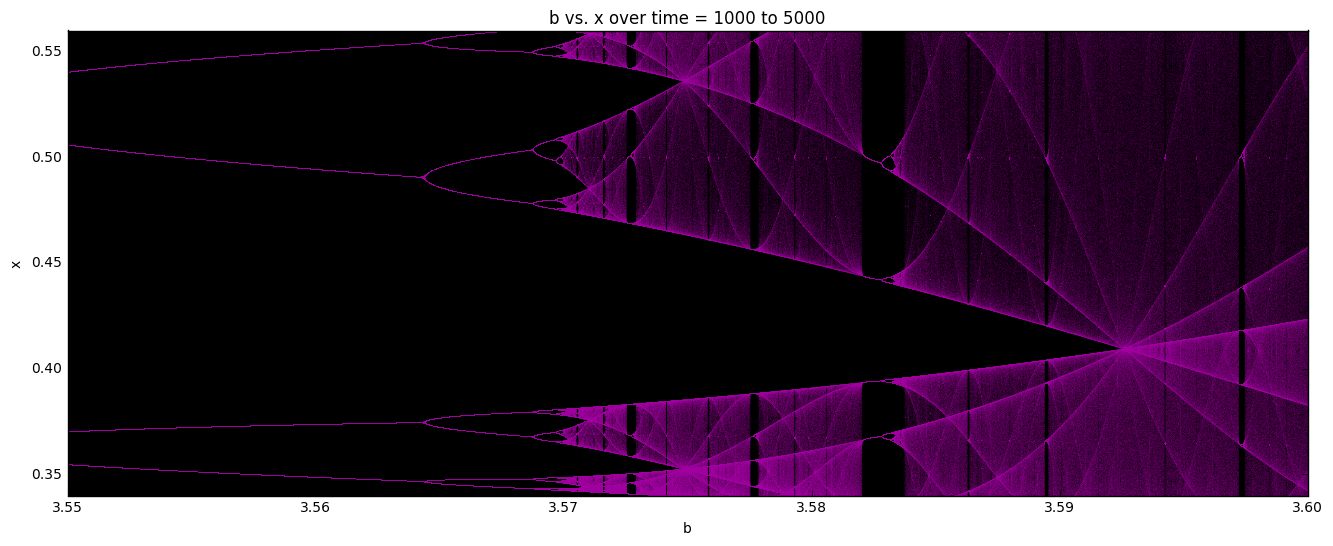

In [24]:
fig = plt.figure(figsize = (16,6))
subplot(111, axisbg='black')
asym(3.55,3.6,.34,.56,5000, op = .2)


Around this area is where we see those intersections that I mentioned earlier, which might be indication of the butterfly effect. I'd like to think of it as the new starting point and as you can see as the b value increases there are different paths the population can take. It's hard to say for certain since the y axis has the implicit time dependence, but that's how I'm interpreting the data. 